# Estimating the proportion of population using illegal drugs by simulating 20 hypothetical respondents using a randomised response scheme

The file **randRes.RData** was obtained from a University website.

The following gives a data dictionary for the dataframe `randRes`.

* `trueAnswer` - the respondent’s true answer to the survey question, taking the values 1 (for ‘yes’) and 0 (for ‘no’)
* `coin` - the result of the respondent’s coin toss, taking the values 1 (for ‘heads’) and 0 (for ‘tails’)
* `surveyAnswer` - the respondent’s answer to the survey question when using the randomised response scheme, taking the values 1 (for ‘yes’) and 0 (for ‘no’); this is the only variable for which a real survey could collect data.

In [1]:
# load dataframe
load("randRes.RData")

#Check what dataframes have loaded
ls()

[1] "randRes"

In [2]:
# Check structure
str(randRes)

'data.frame':	20 obs. of  3 variables:
 $ trueAnswer  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ coin        : int  0 0 1 0 0 1 1 1 1 1 ...
 $ surveyAnswer: num  1 0 1 0 0 1 1 1 1 1 ...


In [4]:
#display whole dataframe
randRes

trueAnswer,coin,surveyAnswer
1,0,1
0,0,0
0,1,1
0,0,0
0,0,0
0,1,1
0,1,1
0,1,1
0,1,1
0,1,1


In [15]:
# count how many responses are 'yes'
sum(randRes$surveyAnswer)

[1] 12

In [9]:
# calc p-hat
((2*12)/20)-1

[1] 0.2

In [14]:
# count how many true are 'yes'
sum(randRes$trueAnswer)

[1] 3

In [10]:
# calc proportion of true 'yes'
3/20

[1] 0.15

The randomised response is not that far off from the estimated response. We would expect some extra variation when anonymising data like this, but for a small group (n is less than 25) this isn't too bad. If we had more participants I would expect the estimate and the true value to get even closer. But all things considered this is not bad.

In [48]:
# set seed (m is 7 to start)
set.seed(7)
# generate new objects
trueAnswer2 <- rbinom(1000,1,0.1)
coin2  <- rbinom(1000,1,0.5)
result  <- trueAnswer2 + coin2
surveyAnswer2 <- ifelse(result>0,1,0)

In [49]:
# count how many response are 'yes'
sum(surveyAnswer2)

[1] 523

In [50]:
# calc p-hat
((2*523)/1000)-1 

[1] 0.046

In [33]:
# set seed 
set.seed(4)
# generate new objects
trueAnswer2 <- rbinom(1000,1,0.1)
coin2  <- rbinom(1000,1,0.5)
result  <- trueAnswer2 + coin2
surveyAnswer2 <- ifelse(result>0,1,0)

In [34]:
# count how many response are 'yes'
sum(surveyAnswer2)

[1] 558

In [35]:
# calc p-hat
((2*558)/1000)-1 

[1] 0.116

In [38]:
# set seed 
set.seed(8)
# generate new objects
trueAnswer2 <- rbinom(1000,1,0.1)
coin2  <- rbinom(1000,1,0.5)
result  <- trueAnswer2 + coin2
surveyAnswer2 <- ifelse(result>0,1,0)

In [39]:
# count how many response are 'yes'
sum(surveyAnswer2)

[1] 556

In [40]:
# calc p-hat
((2*556)/1000)-1 

[1] 0.112

In [43]:
# set seed 
set.seed(3)
# generate new objects
trueAnswer2 <- rbinom(1000,1,0.1)
coin2  <- rbinom(1000,1,0.5)
result  <- trueAnswer2 + coin2
surveyAnswer2 <- ifelse(result>0,1,0)

In [44]:
# count how many response are 'yes'
sum(surveyAnswer2)

[1] 562

In [45]:
# calc p-hat
((2*562)/1000)-1 

[1] 0.124

The four values for $\widehat{p}$ were

* 0.046
* 0.116
* 0.112
* 0.124

Apart from the first result they are all very close to 0.1. However the first result isn't that far off

In [63]:
# set seed 
set.seed(3)
pHat  <- NULL
for (k in 1:10000)
{
trueAnswer3 <- rbinom(1000,1,0.1)
coin3  <- rbinom(1000,1,0.5)
result  <- trueAnswer3 + coin3
surveyAnswer3 <- ifelse(result>0,1,0)
nYes  <- sum(surveyAnswer3)
pHat[k]  <- (2*nYes)/1000 - 1
}

[1] 0.100215

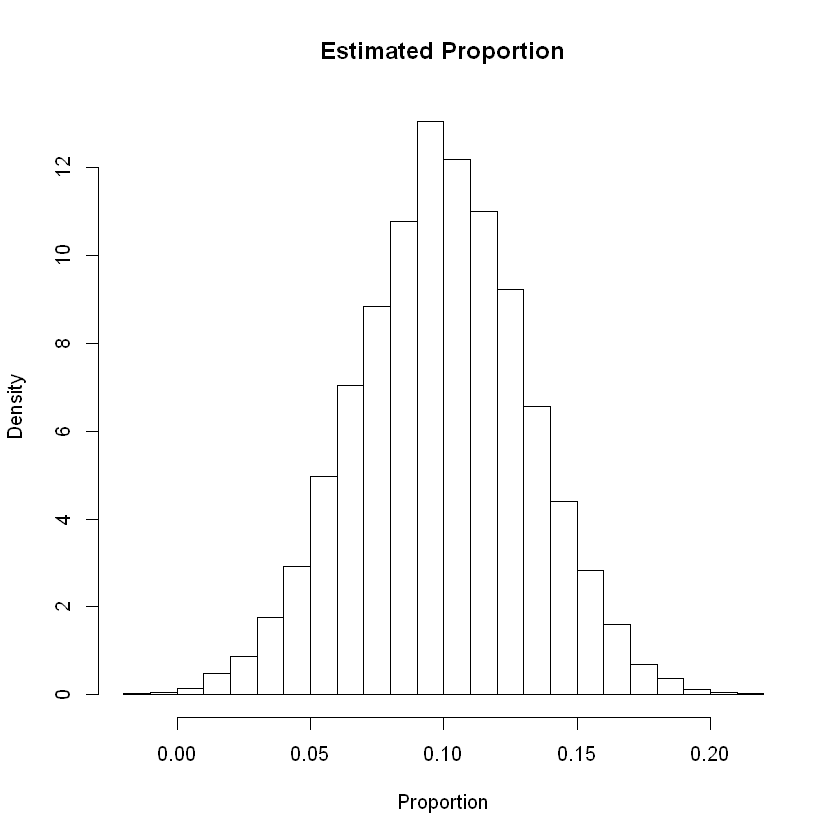

In [76]:
# get the mean
sum(pHat)/10000

# plot histogram
hist(pHat, prob = T,
     main="Estimated Proportion",
     xlab="Proportion",
     breaks = 20)

The distribution of $\widehat{p}$ when there are 1000 respondents appears to follow the normal distribution with a peak at around 0.1, when there are 1000 respondents and the actual value of p is 0.1. 

This is to be expected and is to do with the central limit theorem. Which in essence is that is you take enough samples from any other type of underlying distribution (in this case binomial) then it becomes normally distributed. 

In this case the probability was 0.1, hence the peak of this distribution is around that value.